# Predicting heart disease using ML

In this notebook we are going to use various ML libraries in an attempt to build a ML model which can predict whether some one has heart disease or not

## Approach followed

1. Problem definition
2. Data 
3. Evaluation
4. Features
5. Modelling
6. Experimenting(will be followed in ever step)

### 1. Problem Defenition

> Given the required clinical data can we predict whether a person has heart disease or not

### 2. DATA

* refer UCI : https://archive.ics.uci.edu/ml/datasets/heart+Disease
* refer Kaggle : https://www.kaggle.com/ronitf/heart-disease-uci

We are going to user 14(Widely used) dataset out of 76(Original) attributes

### 3. Evaluation

> If we can get an accuracy of accuracy >= 95% .Then we can say it as a good model.

### 4. Features

*** Creating Data Dictionary ***

 
#### Attributes (13) : (Independent variables)

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

#### Final (1) : (Dependent on Attributes)

* target (yes - 1 / no - 0)

## Preparing the tools

* pandas
* numpy
* seaborn
* matplotlib

for data analysis and manipulation

* Regression
* Classification

Scikit-learn models

* Spliting
* Cross validation
* Evaluation method libraries
 
for evaluation 


In [1]:
# Data analysis libraries
import pandas as pd
import numpy as np
import seaborn as sns
# to make the plots appear in the notebook
%matplotlib inline 
import matplotlib.pyplot as plt

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


## Load the data

In [2]:

heart_disease = pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")

# Displaying the first 10 data in the dataset
heart_disease.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


### Data Exploration
The goal here is to gain more information from the data

1. What are you trying to solve ?
2. What kind of data we have and how to treat different types ?
3. What is missing from the data and how to deal with it ?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data ?

In [3]:
# How many class we have
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

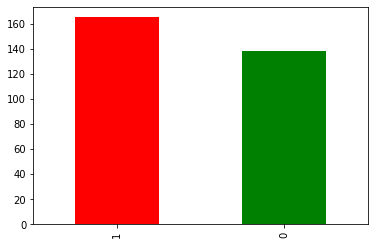

In [4]:
heart_disease["target"].value_counts().plot(kind = "bar", color = ["red","green"]);

In [5]:
# Checking whether our data has any missing values
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

we don't have any missing data here 

In [6]:
# Describing our data
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


> [NOTE]: The upcoming steps can be performed with an attributes but here we are going to use some columns which gets our eyes

## Heart Disease Frequency VS Sex

### SEX
* 1 - MALE
* 0 - FEMALE

### Target
* 1 - YES
* 0 - NO

In [7]:
heart_disease.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [8]:
pd.crosstab(heart_disease.target,heart_disease.sex)

sex,0,1
target,,
0,24,114
1,72,93


this based on our present dataset it may be different in the real world

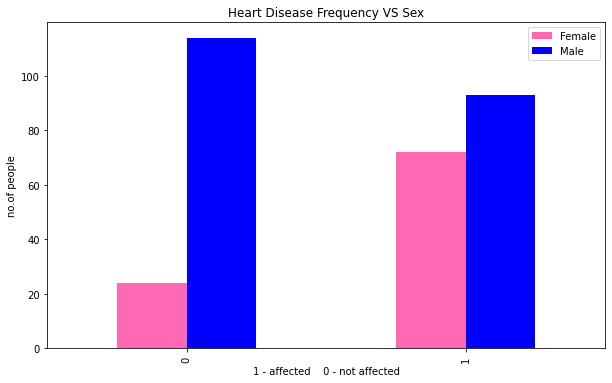

In [9]:
# ploting the cross tab

pd.crosstab(heart_disease.target,heart_disease.sex).plot(kind = "bar",
                                                         figsize = (10,6),
                                                         color=["hotpink","blue"]);
plt.title("Heart Disease Frequency VS Sex")
plt.xlabel("1 - affected    0 - not affected")
plt.ylabel("no.of people")
plt.legend(["Female","Male"]);

### Max heart rate(thalach)  VS  Age for heart disease

In [10]:
heart_disease["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

as the length is 91(91 differnt values) we cannot use bar graph 

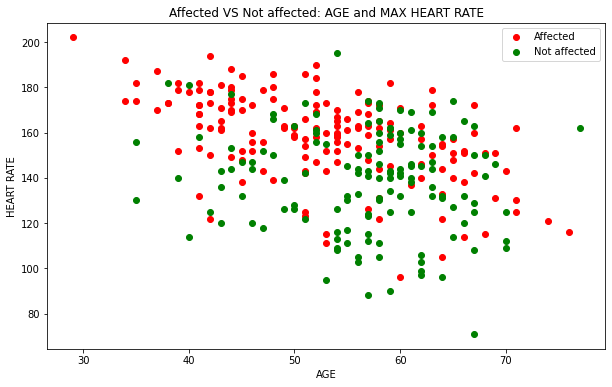

In [11]:
# Scatter plot
plt.figure(figsize = (10,6))

# Scatter with positive examples
plt.scatter(heart_disease.age[heart_disease.target == 1],
            heart_disease.thalach[heart_disease.target == 1],
            c="red")

#Scatter with negative examples
plt.scatter(heart_disease.age[heart_disease.target == 0],
            heart_disease.thalach[heart_disease.target == 0],
            c="green")

# Labeling
plt.title("Affected VS Not affected: AGE and MAX HEART RATE")
plt.xlabel("AGE")
plt.ylabel("HEART RATE")
plt.legend(["Affected","Not affected"]);

As the finding the trend by ourself is dificult we will make the ML model to do the work for us

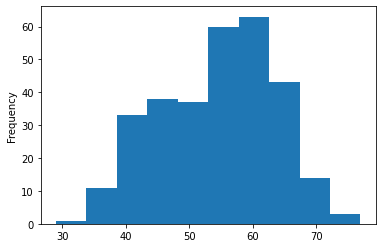

In [12]:
# Check how the data has been spread over
heart_disease.age.plot.hist();

A perfectly distributed data looks like : https://www.simplypsychology.org/normal-distribution.html

Here we are looking for outliers but we dont have any here

## Hear Disease vs Chest pain types
 Chest pain:
* 0: Typical angina - related to heart
* 1: Atypical angina - not related to heart
* 2: Non-anginal - not related to heart
* 3: Asymptomatic - not showing signs of disease

In [13]:
pd.crosstab(heart_disease.cp,heart_disease.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


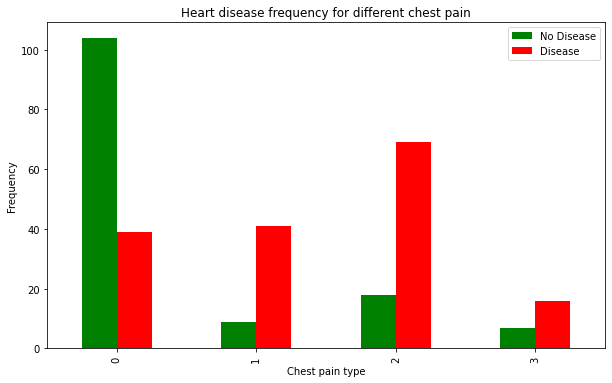

In [14]:
# Plot the crosstab

pd.crosstab(heart_disease.cp,heart_disease.target).plot(kind = "bar",
                                                        figsize = (10,6),
                                                        color = ["green","red"])

plt.title("Heart disease frequency for different chest pain")
plt.xlabel("Chest pain type")
plt.ylabel("Frequency")
plt.legend(["No Disease","Disease"]);

## Correlation between the Attributes and the target

In [15]:
# Tabular format
heart_disease.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


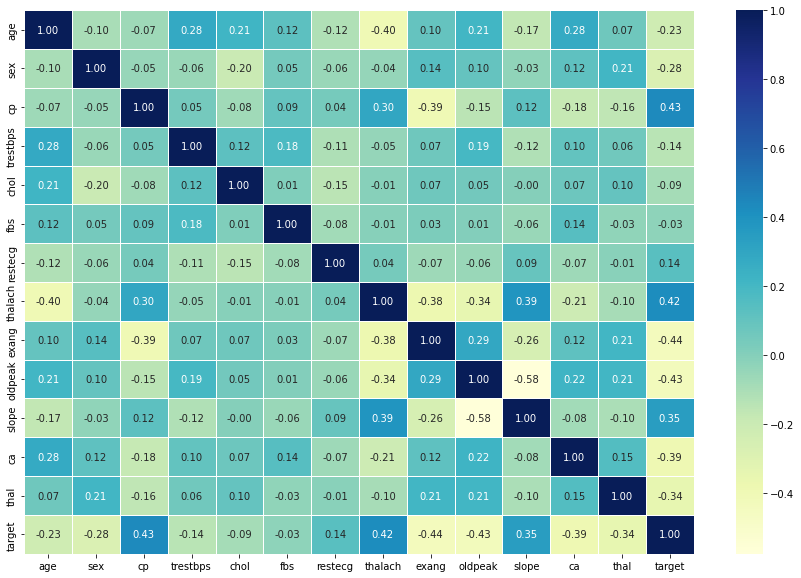

In [16]:
# Visual format
corr_mat = heart_disease.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_mat,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

To know more about correlation : https://www.displayr.com/what-is-a-correlation-matrix/#:~:text=A%20correlation%20matrix%20is%20a,a%20diagnostic%20for%20advanced%20analyses.

## Modeling 
* We have a classification problem

To know more about Supervised data Classification VS Regression:https://www.google.com/search?q=classification+vs+regression&rlz=1C1ONGR_enIN973IN973&oq=classification+vs+&aqs=chrome.0.0i433i512j0i512j69i57j0i512l7.9790j1j15&sourceid=chrome&ie=UTF-8

In [17]:
# Splitting the data

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

Visualizing X an Y

In [18]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [19]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [20]:
# Spliting the data into train and test dataset

# to reproduce the exact data chosen
np.random.seed(42) 

# Actual splitting
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


why we need to split our data into test and train : https://docs.microsoft.com/en-us/analysis-services/data-mining/training-and-testing-data-sets?view=asallproducts-allversions#:~:text=Separating%20data%20into%20training%20and,of%20evaluating%20data%20mining%20models.&text=Because%20the%20data%20in%20the,the%20model's%20guesses%20are%20correct.

In [21]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [22]:
y_train,len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

### Train and Test the set by Fitting it into a Model

* LogisticRegression
* KNeighbors
* Ensembler(RandomForestClassifier)

Yes we can use Logistic"Regression" for classification for more details : https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [23]:
# Put models in a dictionary
models = {
          "Logistic Regression": LogisticRegression(solver='liblinear'), 
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()
          }

# Create function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [24]:
model_scores = fit_and_score(models = models,
                             x_train = x_train,
                             x_test = x_test,
                             y_train = y_train,
                             y_test = y_test)

model_scores

{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

if we see in the above result Logistic Regression has higher value. 

The above warning suggesting us an way to improve the logistic regression model

## Model comparision

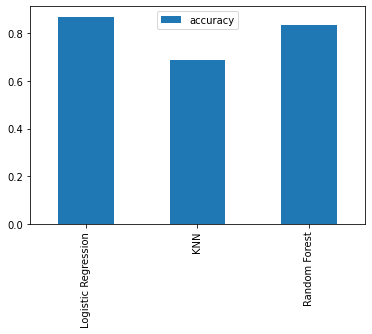

In [25]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar();

## Improving the model

we are going to do the following:

* Hyperparameter tuning
* Feature importance
* Confusion Matrix
* Cross-validation
* Precision (mean absolute error)
* Recall (mean squared error)
* F1 score (root mean squared error)
* Classification report
* ROC curve
* Area Under the curve


### Hyperparameter Tuning

> KNN

In [26]:
# Tuning KNN

train_score = []
test_score = []

# Create a list of different values for n_neighbors

neighbors = range(1,21)

# Setup KNN instance

knn = KNeighborsClassifier()

# Loop through differnt n_neighbors

for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # fit the algo
    knn.fit(x_train,y_train)
    
    # Update the training score and test scores
    
    train_score.append(knn.score(x_train,y_train))
    
    test_score.append(knn.score(x_test,y_test))

In [27]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [28]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


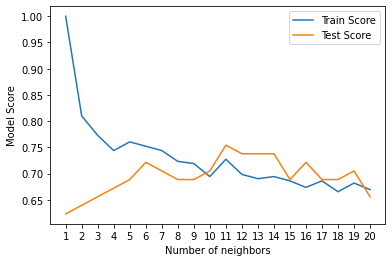

In [29]:
plt.plot(neighbors, train_score, label = "Train Score")
plt.plot(neighbors, test_score, label = "Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_score)*100:.2f}%")

The heighest score is 75.41%
* [note] we can still try different range of n_neighbors int this case i tried some and stil didn't get anything to the mark

Good bye KNN....

## Hyperparameter with RandomizedSearchCV

to know more about it : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

> Logistic Regression
And
> RandomForest

In [30]:
# Create a hyperparameter grid for logostic regression

log_reg_grid = {"C" : np.logspace(-4, 4, 20),
                "solver" : ["liblinear"]}

# Create a hyperparameter for RandomForest Classifier

rf_grid = {"n_estimators" : np.arange(10, 1000, 50),
           "max_depth" : [None, 3, 5, 10],
           "min_samples_split" : np.arange(2, 20, 2),
           "min_samples_leaf" : np.arange(1, 20, 2)}

In [31]:
# Tune using RandomizedSearchCV

np.random.seed(42)

# LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)
# Fit the model

rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [32]:
# Check the best params
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [33]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

the model didnt improverd it remained the same, let leave it as it is for now

***RandomForestClassifier***

In [34]:
# Set the random seed
np.random.seed(42)

#RandomForest

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose = True)

# Fit the model
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [35]:
# Best parameters

rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [36]:
rs_rf.score(x_test,y_test)

0.8688524590163934

The score has certainly increased by 0.32

But still Logistic Regression holds upperhand here

bye bye RandomForestRegression...

### Improving the Logistic model

Let revisit what we did while improving the model
* By hand - KNN eliminated
* RandomizedSearchCv - RandomForestClassification eliminated
* GridSearchCv - upcoming...

## Tuning Hyperperameter using GridSearchCv
> LogisticRegression


to know more about GridSearchCv : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [37]:
# Set up hyperparameter
log_reg_grid = {"C" : np.logspace(-4, 4, 20),
                "solver" : ["liblinear"]}

# Set the grid 
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv = 5,
                          verbose = True)

# Fit the model
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [38]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [39]:
# Evaluate

gs_log_reg.score(x_test,y_test)

0.8852459016393442

Still we did get the same as baseline and RandomizedSearchCV :\

## Evaluating the models beyond score
* ROC curve & AUC score 
* Confusion matrix
* Classification report
    * Precision
    * Recall
    * F1 score

 We have to make prediction inorder to compare the models

In [40]:
y_pred = gs_log_reg.predict(x_test)

y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

> ROC curve & AUC score

* Check out this link : https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc#:~:text=An%20ROC%20curve%20

perfect model AUC score = 1

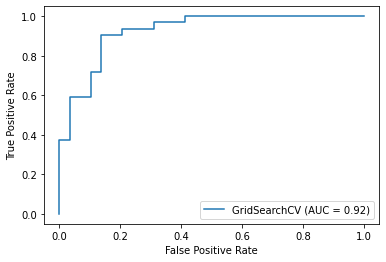

In [41]:
plot_roc_curve(gs_log_reg, x_test, y_test);

AUC score = 0.92

> Confusion matrix

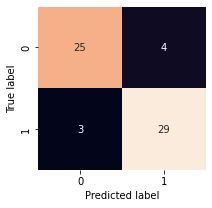

In [42]:
def plot_conf_mat(y_test,y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                     annot = True,
                     cbar = False)
    
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_mat(y_test,y_pred)

> Classification report

* Precision
* Recall
* F1 score

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



These are calculates only with single split

### Using cross validation
> Classification report

* Accuracy
* Precision
* Recall
* F1 score

In [44]:
# Create a new classifier using best params

clf  = LogisticRegression(C=0.23357214690901212,
                          solver = "liblinear")

In [45]:
# Cross-validated Accuracy

cv_acc = cross_val_score(clf,x,y,cv=5,scoring="accuracy")

cv_acc

acc_mean = np.mean(cv_acc)
acc_mean

0.8479781420765027

In [46]:
# Cross-validated Precision

cv_pre = cross_val_score(clf,x,y,cv=5,scoring="precision")

cv_pre

pre_mean = np.mean(cv_pre)
pre_mean

0.8215873015873015

In [47]:
# Cross-validated Recall

cv_re = cross_val_score(clf,x,y,cv=5,scoring="recall")

cv_re

re_mean = np.mean(cv_re)
re_mean

0.9272727272727274

In [48]:
# Cross-validated F1 score

cv_f1 = cross_val_score(clf,x,y,cv=5,scoring="f1")

cv_f1

f1_mean = np.mean(cv_f1)
f1_mean

0.8705403543192143

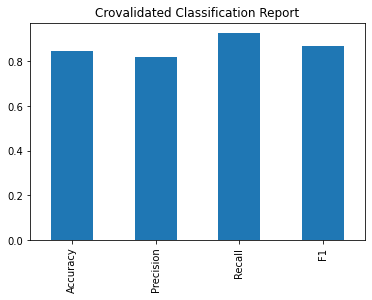

In [49]:
# Visualizing cross validated matrix

cv_metrics = pd.DataFrame({"Accuracy":acc_mean,
                           "Precision":pre_mean,
                           "Recall":re_mean,
                           "F1":f1_mean},
                            index = [0])
cv_metrics.T.plot.bar(title = "Crovalidated Classification Report",legend = False);

## Important Features

> This is different for different models

for LogisticRegression

In [50]:
clf  = LogisticRegression(C=0.23357214690901212,
                          solver = "liblinear")

# fit the model

clf.fit(x_train,y_train);

In [51]:
# Coefficient : how the attributes contribute for prediction
clf.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

In [52]:
# Match the coefficient to the columns
feature_dict = dict(zip(heart_disease.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.003699220776580221,
 'sex': -0.9042409028785717,
 'cp': 0.6747282587404362,
 'trestbps': -0.011613401339975146,
 'chol': -0.0017036439067759743,
 'fbs': 0.047876881148997324,
 'restecg': 0.3349019815885189,
 'thalach': 0.02472938284108309,
 'exang': -0.6312040612837573,
 'oldpeak': -0.5759095045469952,
 'slope': 0.4709514073081419,
 'ca': -0.6516534770577476,
 'thal': -0.6998420764664995}

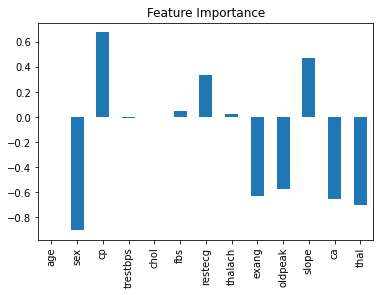

In [53]:
# Visualize it
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title="Feature Importance",legend = False);

We can analyse the above graph and improve our dataset much more

# Conclusion
* We got accuracy of 88.5% which is low in this case
* We cannot practically implement it

> Want we can do?

* Try better model like CatBoost or XGBoost
* Try to collect more data